In [90]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [92]:
import io

In [94]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [96]:
df.count()

,0
Age,200
Annual Income,200
Spending Score,200


In [95]:
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [97]:
df.tail()

,Age,Annual Income,Spending Score
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18
199,30,137,83


In [98]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [99]:
# 1. Data Dimensionality
# Total number of customers
total_customers = df.shape[0]

# Number of attributes (categories)
number_of_attributes = df.shape[1]

# Data types of the attributes
data_types = df.dtypes

# Checking for missing values
missing_values = df.isnull().sum()

# Printing the results
print(f"Total number of customers: {total_customers}")
print(f"Number of attributes: {number_of_attributes}")
print("\nData Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)

Total number of customers: 200
Number of attributes: 3

Data Types:
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

Missing Values:
Age               0
Annual Income     0
Spending Score    0
dtype: int64


In [101]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Age', 'Annual Income', 'Spending Score']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

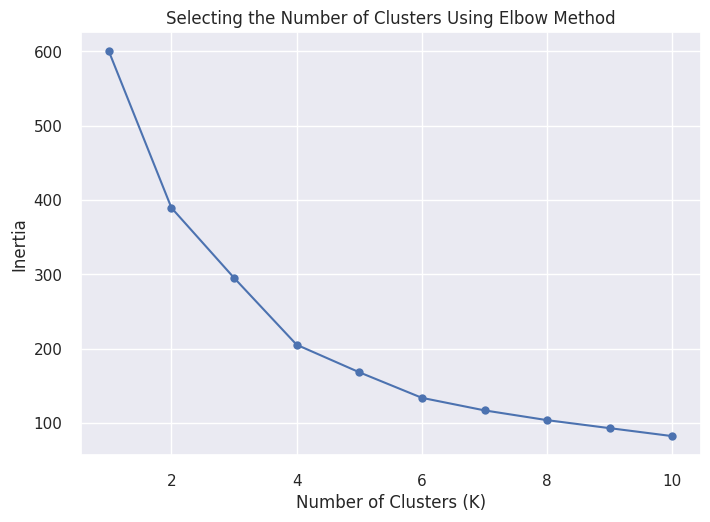

In [102]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

sns.set()

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Selecting the Number of Clusters Using Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

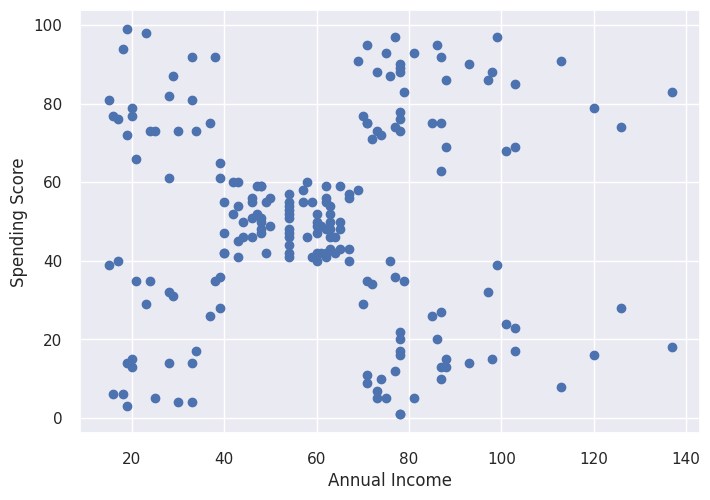

In [103]:
plt.scatter(df['Annual Income'], df['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [113]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


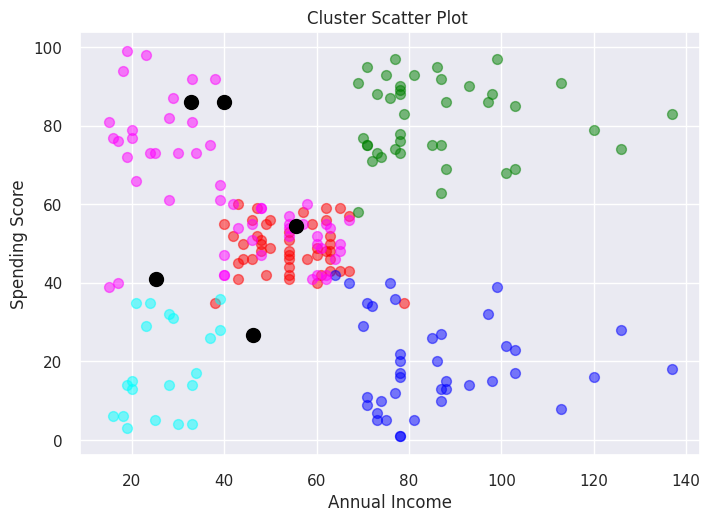

In [122]:
for cluster in range(5):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'],c=colors[cluster], s=50, alpha=0.5, label=f'Cluster {cluster}')

# Plot centroids
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
centroid_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Annual Income', 'Spending Score', 'Age'])
plt.scatter(centroid_df['Annual Income'], centroid_df['Spending Score'],c='black', s=100, marker='o')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Cluster Scatter Plot ')
plt.show()

In [114]:
cluster_stats = df.groupby('Cluster')[['Age','Annual Income', 'Spending Score']].agg(['count', 'min', 'max', 'mean'])
print("Cluster Statistics:")
print(cluster_stats)


Cluster Statistics:
          Age                    Annual Income                      \
        count min max       mean         count min  max       mean   
Cluster                                                              
0          47  40  70  55.638298            47  38   79  54.382979   
1          39  19  59  39.871795            39  64  137  86.102564   
2          40  27  40  32.875000            40  69  137  86.100000   
3          20  20  67  46.250000            20  16   39  26.750000   
4          54  18  38  25.185185            54  15   67  41.092593   

        Spending Score                     
                 count min max       mean  
Cluster                                    
0                   47  35  60  48.851064  
1                   39   1  42  19.358974  
2                   40  58  97  81.525000  
3                   20   3  36  18.350000  
4                   54  39  99  62.240741  
